# Advancements in Music Mood Classification: Machine Learning Techniques for Analysing Emotional States in Music

C:\Users\bazzu\AppData\Local\Temp\ipykernel_8084\2565293543.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


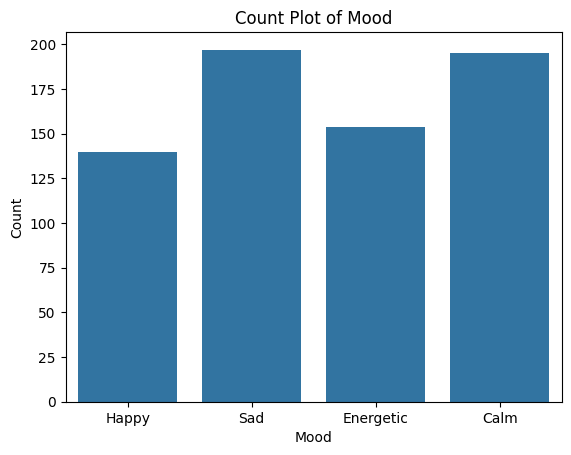

0      2
1      3
2      3
3      2
4      1
      ..
681    0
682    3
683    3
684    3
685    0
Name: mood, Length: 686, dtype: int32
(686,)
(686, 17)
XGB Classifier Accuracy: 87.68115942028986
[[36  0  0  0]
 [ 0 32  5  0]
 [ 0  5 16  5]
 [ 0  0  2 37]]


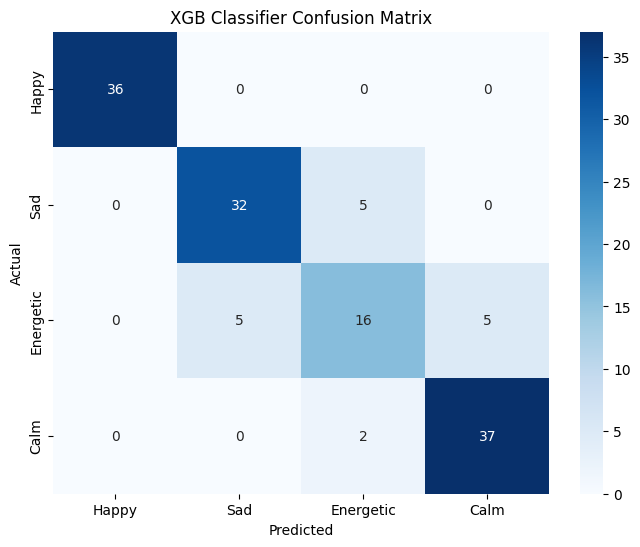

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.86      0.86      0.86        37
           2       0.70      0.62      0.65        26
           3       0.88      0.95      0.91        39

    accuracy                           0.88       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.87      0.88      0.87       138



C:\Users\bazzu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Model Accuracy: 89.85507246376811
[[36  0  0  1]
 [ 0 34  6  0]
 [ 0  2 16  3]
 [ 0  1  1 38]]


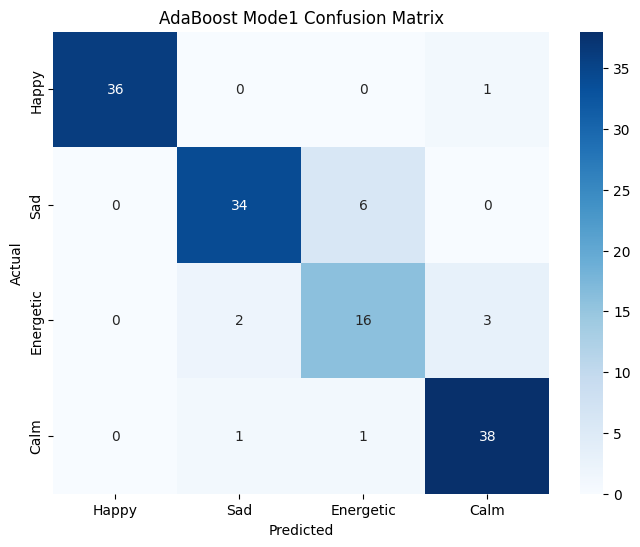

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.92      0.85      0.88        40
           2       0.70      0.76      0.73        21
           3       0.90      0.95      0.93        40

    accuracy                           0.90       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.90      0.90      0.90       138



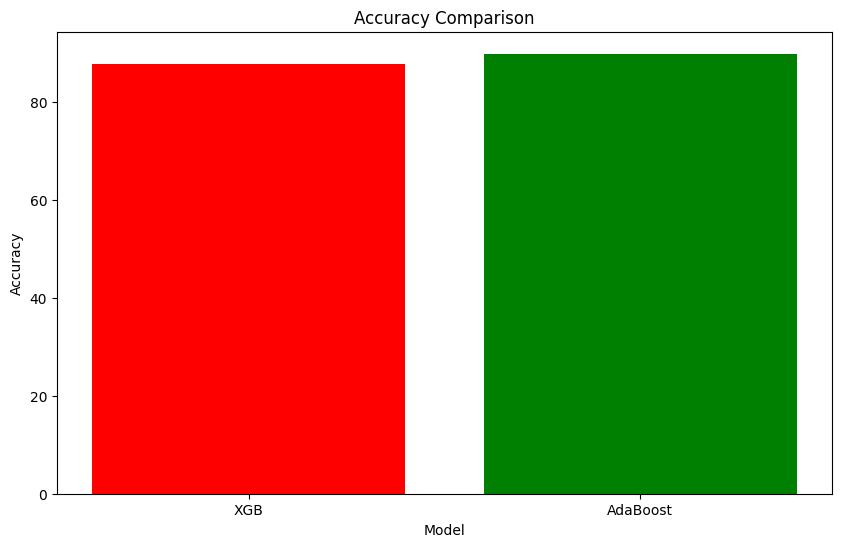

In [1]:
from tkinter import *
import tkinter
from tkinter import filedialog
import numpy as np
from tkinter.filedialog import askopenfilename
import pandas as pd 
from tkinter import simpledialog
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
main = tkinter.Tk()
main.title("Advancements in Music Mood Classification: Machine Learning Techniques for Analysing Emotional States in Music")
main.geometry("1000x650")
global filename
global rnn_acc,lstm_acc
global classifier
global X, y, X_train,y_train,X_test,y_test,Predictions
global df
global le

def upload():
    global filename
    global df
    filename = filedialog.askopenfilename(initialdir = "dataset")
    text.delete('1.0', END)
    text.insert(END,filename+' Loaded\n\n')
    df= pd.read_csv(filename)
    text.insert(END,str(df.head))


def preprocess():
    global dataset
    global X, y, X_train,y_train,X_test,y_test
    global le
    text.delete('1.0', END)
    sns.countplot(x='mood', data=df)
    plt.xlabel('Mood')
    plt.ylabel('Count')
    plt.title('Count Plot of Mood')
    plt.show()
    label_encoder = LabelEncoder()
    df['mood'] = label_encoder.fit_transform(df['mood'])
    df['name']=label_encoder.fit_transform(df['name'])
    df['album']=label_encoder.fit_transform(df['album'])
    df['artist']=label_encoder.fit_transform(df['artist'])
    df['release_date'] = df['release_date'].apply(lambda x: int(x.replace('-', '')))
    # Feature engineering
    X = df.drop('id',axis=1)
    X=X.drop('mood',axis=1)
    y=df['mood']                      
    print(y)
    text.insert(END,str(X))
    print(y.shape)
    print(X.shape)
    
    text.insert(END,"\n\nTotal Records after preprocessing are : "+str(len(X))+"\n")
    # Splitting training data and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    text.insert(END,"\n\nTotal Records used for training : "+str(len(X_train))+"\n")
    text.insert(END,"\n\nTotal Records used for testing : "+str(len(X_test))+"\n")
    
def run_XGBoost():
    global model
    text.delete('1.0', END)
    global XGB_acc
    model = XGBClassifier()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    XGB_acc = accuracy_score(predictions, y_test)*100
    print('XGB Classifier Accuracy:', XGB_acc)
    text.insert(END, 'XGB Classifier Accuracy : ' + str(XGB_acc) + "\n\n")
    cm=confusion_matrix(predictions, y_test)
    print(cm)
    plt.figure(figsize=(8, 6))
        # Use seaborn's heatmap to plot the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Happy', 'Sad', 'Energetic', 'Calm'], 
                yticklabels=['Happy', 'Sad', 'Energetic', 'Calm'])
    
    plt.title("XGB Classifier Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    text.insert(END, 'XGB Classifer Confusion matrix :\n ' + str(cm) + "\n\n")
    report=classification_report(predictions, y_test)
    text.insert(END, 'XGB Classifer classification report \n: ' + str(report) + "\n\n")
    print(report)

def AdaBoostwithaRandomForest():
    global ADA_acc,adaboost_model
    # Create a base estimator (Random Forest in this case)
    base_estimator = RandomForestClassifier(max_depth=20,n_estimators=300,random_state=0)
    # Create an AdaBoost Classifier with the base estimator
    adaboost_model = AdaBoostClassifier(base_estimator, n_estimators=300,random_state=40)
    # Train the AdaBoost Classifier
    adaboost_model.fit(X_train, y_train)
    # Make predictions
    predictions = adaboost_model.predict(X_test)
    # Calculate accuracy
    ADA_acc = accuracy_score(y_test, predictions)*100
    print(f"AdaBoost Model Accuracy: {ADA_acc}")
    text.insert(END,'AdaBoost Model Accuracy : '+str(ADA_acc)+"\n\n")
    cm=confusion_matrix(predictions, y_test)
    print(cm)
    plt.figure(figsize=(8, 6))
        # Use seaborn's heatmap to plot the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Happy', 'Sad', 'Energetic', 'Calm'], 
                yticklabels=['Happy', 'Sad', 'Energetic', 'Calm'])
    
    plt.title("AdaBoost Mode1 Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    text.insert(END, 'AdaBoost Mode1 Confusion matrix :\n ' + str(cm) + "\n\n")
    report=classification_report(predictions, y_test)
    text.insert(END, 'AdaBoost Mode1 classification report \n: ' + str(report) + "\n\n")
    print(report)

def predict():
    text.delete('1.0', END)
    file = filedialog.askopenfilename(initialdir="dataset")
    test = pd.read_csv(file)
    label_encoder = LabelEncoder()
    test['name'] = label_encoder.fit_transform(test['name'])
    test['album'] = label_encoder.fit_transform(test['album'])
    test['artist'] = label_encoder.fit_transform(test['artist'])
    test['release_date'] = test['release_date'].apply(lambda x: int(x.replace('-', '')))
    # Feature engineering
    test = test.drop('id', axis=1)
    y_pred = adaboost_model.predict(test)
    for i in range(len(test)):
        predict = y_pred[i]
        if predict == 0:
            mood = 'Happy'
        elif predict == 1:
            mood = 'Sad'
        elif predict == 2:
            mood = 'Energetic'
        elif predict == 3:
            mood = 'Calm'
        row_data = test.iloc[i].to_string(index=False)  # Get the entire row as a string
        text.insert(END, f"{row_data }{i + 1} classified as {mood}\n\n")


    
def graph():
    plt.figure(figsize=(10,6))
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.bar(['XGB', 'AdaBoost'], [XGB_acc, ADA_acc], color=['red', 'green'])
    plt.title('Accuracy Comparison')
    plt.show()

def close():
    main.destroy()
  
font = ('times', 15, 'bold')
title = Label(main, text='Advancements in Music Mood Classification: Machine Learning Techniques for Analysing Emotional States in Music', justify=LEFT)
title.config(bg='lavender blush', fg='DarkOrchid1')  
title.config(font=font)           
title.config(height=3, width=120)       
title.place(x=100,y=5)
title.pack()

font1 = ('times', 12, 'bold')
uploadButton = Button(main, text="Upload   Dataset", command=upload)
uploadButton.place(x=10,y=100)
uploadButton.config(font=font1)  

preprocessButton = Button(main, text="Preprocess Dataset", command=preprocess)
preprocessButton.place(x=300,y=100)
preprocessButton.config(font=font1)

XGBButton = Button(main, text="Run XGBOOST Algorithm", command=run_XGBoost)
XGBButton.place(x=480,y=100)
XGBButton.config(font=font1)

adaButton = Button(main, text="AdaBoost with a Random Forest", command=AdaBoostwithaRandomForest)
adaButton.place(x=700,y=100)
adaButton.config(font=font1)

graphButton = Button(main, text="Accuracy Comparison Graph", command=graph)
graphButton.place(x=10,y=150)
graphButton.config(font=font1)

predictButton = Button(main, text="Classifying using Test Data", command=predict)
predictButton.place(x=300,y=150)
predictButton.config(font=font1)

closeButton = Button(main, text="Close Application", command=close)
closeButton.place(x=10,y=200)
closeButton.config(font=font1)

font1 = ('times', 12, 'bold')
text=Text(main,height=20,width=160)
scroll=Scrollbar(text)
text.configure(yscrollcommand=scroll.set)
text.place(x=10,y=250)
text.config(font=font1) 

main.config(bg='light coral')
main.mainloop()
